Total time(s):  7.881512316200001  Average time (s):  0.11590459288529413
                                                          
|   Size(vertex) |   Run Time(s) |   Asyn Complexity |
|----------------+---------------+-------------------|
|             10 |   2.74202e-05 |       2.07233e-05 |
|             10 |   3.563e-05   |       2.53284e-05 |
|             10 |   3.24924e-05 |       2.99336e-05 |
|             10 |   2.70872e-05 |       2.30259e-05 |
|             20 |   5.6439e-05  |       7.18976e-05 |
|             20 |   5.72652e-05 |       7.18976e-05 |
|             20 |   6.2369e-05  |       8.38805e-05 |
|             20 |   5.6251e-05  |       7.7889e-05  |
|             40 |   0.000127557 |       0.000206577 |
|             40 |   0.000116655 |       0.000184444 |
|             40 |   0.000116174 |       0.000184444 |
|             40 |   0.000117428 |       0.000191822 |
|             80 |   0.000336267 |       0.000473259 |
|             80 |   0.000420579 |       0

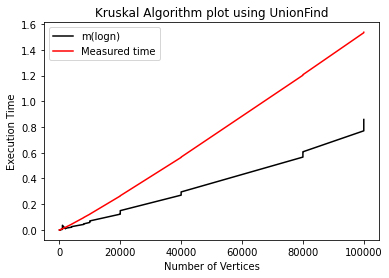

In [33]:
from time import perf_counter_ns
import gc
import math
import matplotlib.pyplot as plt
import os
from pathlib import Path
from tabulate import tabulate

#class UnionFind for datastructure
class UnionFind:
    parent = {}
    # stores the depth of trees
    rank = {}
 
    def init(self, n): 
        # create n (number of vertices) sets, I start from 1 because the vertices in graphs start with 1
        i = 1
        while i < n +1:
            self.parent[i] = i
            self.rank[i] = 0
            i = i + 1
 
    def find(self, k):
        # if `k` is the root
        if self.parent[k] == k:
          return k
        else: 
          self.parent[k] = self.find(self.parent[k])
          return self.parent[k]
         

    def union(self, a, b):
        # find the parents of the two vertices
        x = self.find(a)
        y = self.find(b)
 
        # if `x` and `y` are present in the same set => 
        if x == y:
            return
 
        # Always attach a smaller depth tree under the root of the deeper tree.
        if self.rank[x] > self.rank[y]:
            self.parent[y] = x
            self.rank[x] += self.rank[y]
        elif self.rank[x] < self.rank[y]:
            self.parent[x] = y
            self.rank[y] += self.rank[x]
        else:
            self.parent[x] = y
            self.rank[y] = self.rank[y] + 1

#class graph to rapresent graph
class Graph :
  def __init__(self, vertices, edges):
      #number of vertices in the graph
      self.V = vertices
      #number of edges in the graph
      self.E = edges
      #vertices1, vertices2, weight
      self.graph = []

  def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

#function to create a graph from data
def create_graph(data):
  g = Graph(int(data[0][0]), int(data[0][1]))
  i = 1
  while(i < len(data)-1):
    values = data[i]
    g.add_edge(int(values[0]), int(values[1]), int(values[2]))
    i = i +1 
  return g


#implementation of Kruskal algorithm
def kruskal_algo(g):
  tot_weight = 0
  result = []
  #initialize UnionFind data structure
  u = UnionFind()
  u.init(g.V)
  #sort edges by weight
  g.graph = sorted(g.graph, key=lambda item: item[2])
  edg = 0 

  while edg < g.E: #for each edge e(v, w) do
    v, w, weight = g.graph[edg] #take the edge informations
    edg = edg + 1
    if u.find(v) != u.find(w):
      result.append([v, w, weight])
      u.union(v, w)
      tot_weight += weight
  return result, tot_weight

def plotResult(valone, valtwo):
    #sort the keys (number of vertices) of the dictionary and plot them
    plt.plot(*zip(*sorted(valone) ),'k')
    plt.plot(*zip(*sorted(valtwo) ),'r')
    plt.legend(["m(logn)","Measured time" ])
    # x-axis label
    plt.xlabel('Number of Vertices')
    # frequency label
    plt.ylabel('Execution Time')
    # plot title
    plt.title('Kruskal Algorithm plot using UnionFind')
    # function to show the plot
    plt.show()
    

data_set = '/mst_dataset'
num_istances = 68
num_calls = 5
tentonine = 1000000000
files = os.listdir(data_set)
files = sorted(files)
weights = []
mapVertice_time = []
vertice_edge_time = []
total_time = 0.0
name = []
asyn_compl = []

complexity = []
vertices = []
all_runs = []


for filename in files:
  f = os.path.join(data_set, filename)
  if os.path.isfile(f):
      name.append(str(f))
      #read file and get the data
      file = open(f,'r')
      data = file.read().split("\n")
      for i in range(len(data) - 1):
        data[i] = data[i].split(" ")
      #creating the graph
      g = create_graph(data)

      #calculate times for one graph
      gc.disable()
      start_time = perf_counter_ns()
      for i in range(num_calls):
        r, w = kruskal_algo(g)
      end_time = perf_counter_ns()
      gc.enable()
      #append the weight of result in the total list
      weights.append(w)
      run_times = ((end_time - start_time)/num_calls)/tentonine
      all_runs.append(run_times)
      total_time += run_times
      #add the time taken corresponding to the number of nodes in a map for each graph to plot it at the end in a line chart
      mapVertice_time.append((int(g.V), run_times) ) 
      vertice_edge_time.append((int(g.V), int(g.E), run_times))

      mlogn = abs(int(g.E))* math.log(abs(int(g.V)))/1000000
      complexity.append(mlogn)
      vertices.append(g.V)
      asyn_compl.append((int(g.V), mlogn))

      

avg_time = (total_time / num_istances) 

print("Total time(s): ", total_time, " Average time (s): ", avg_time)

print("                                                          ")

#--------------------------------------------------------------
#printing table size | run_times | mlogn
zipSizeRunTimeAsyn = zip(vertices, all_runs, complexity)

tableSizeRunMlogn = tabulate(zipSizeRunTimeAsyn, headers=['Size(vertex)', 'Run Time(s)', 'Asyn Complexity'], tablefmt='orgtbl')

print(tableSizeRunMlogn)

#--------------------------------------------------------------
print("                                                          ")
#--------------------------------------------------------------
#printing table file name | weight of results
zipNameWeight = zip(name, weights)

tableNameWeight = tabulate(zipNameWeight, headers=['Name of the file', 'Weight of MST'], tablefmt='orgtbl')

print(tableNameWeight)
print("                                                          ")
#--------------------------------------------------------------

plotResult(mapVertice_time, asyn_compl)